In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
import numpy as np
import scipy.stats
from scipy.stats import norm
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LeakyReLU
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
toScale = pd.read_csv('train2021.csv')
ending_ask_train = toScale['ending_ask']
del toScale['ending_ask']

In [6]:
print (toScale.head(1))

   strike     bid     ask  underlying_bid  underlying_ask  timeToMaturity  \
0    1650  1063.1  1071.8         2687.09         2741.45             144   

   sP500AdjClose   sP500High  sP500Low   sP500Close  moneyness  \
0    2724.870117  2724.98999   2698.75  2724.870117       1.65   

   statisticalVolatility  vixIndex  extremeVolatility  garmanKlass  riskFree  
0                0.12497     15.73           0.045924     0.040213      2.37  


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scale_train = scaler.fit_transform(toScale)
scale_train = pd.DataFrame(scale_train,columns=toScale.columns.values)
scale_train['ending_ask'] = ending_ask_train
scale_train.to_csv("train2021Scaled.csv", index=False)

In [3]:
scale_train = pd.read_csv("endingNotScaledTrain.csv")

X = scale_train
Y = scale_train['ending_ask']
del X['ending_ask']

In [3]:
print(X.shape)
print(Y.shape)

(30000, 16)
(30000,)


In [15]:
nodes = 6
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [16]:
model.fit(X, Y, batch_size=64, epochs=100, validation_split=0.1, verbose=2)

Epoch 1/100
422/422 - 0s - loss: 1560202.3750 - val_loss: 1518919.3750
Epoch 2/100
422/422 - 0s - loss: 1422165.7500 - val_loss: 1293989.1250
Epoch 3/100
422/422 - 0s - loss: 1112190.6250 - val_loss: 879079.1875
Epoch 4/100
422/422 - 0s - loss: 678853.7500 - val_loss: 366906.1875
Epoch 5/100
422/422 - 0s - loss: 371918.4688 - val_loss: 102944.5781
Epoch 6/100
422/422 - 0s - loss: 330005.6562 - val_loss: 93000.1484
Epoch 7/100
422/422 - 0s - loss: 322964.4062 - val_loss: 84177.4219
Epoch 8/100
422/422 - 0s - loss: 313891.3125 - val_loss: 79566.9531
Epoch 9/100
422/422 - 0s - loss: 295565.2500 - val_loss: 66196.3281
Epoch 10/100
422/422 - 0s - loss: 272944.2188 - val_loss: 56825.6641
Epoch 11/100
422/422 - 0s - loss: 255643.8438 - val_loss: 49372.5586
Epoch 12/100
422/422 - 0s - loss: 244411.2812 - val_loss: 51180.1758
Epoch 13/100
422/422 - 0s - loss: 238205.5156 - val_loss: 41700.9141
Epoch 14/100
422/422 - 0s - loss: 235616.7656 - val_loss: 38576.0977
Epoch 15/100
422/422 - 0s - loss:

In [8]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']
#model.save('model2021_1')
#prediction = model.predict(scale_test)

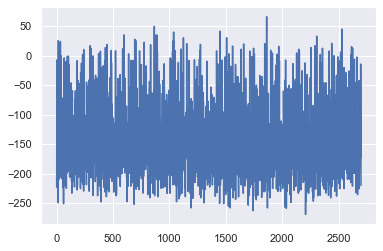

In [18]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [19]:
print (asks[0])
print (prediction[0])

1363.0
[1139.779]


In [20]:
nodes = 10
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [21]:
model.fit(X, Y, batch_size=64, epochs=500, validation_split=0.1, verbose=2)

71.5422
Epoch 207/500
422/422 - 0s - loss: 48946.7305 - val_loss: 4133.7100
Epoch 208/500
422/422 - 0s - loss: 49860.2188 - val_loss: 3747.2214
Epoch 209/500
422/422 - 0s - loss: 49037.1211 - val_loss: 3729.1387
Epoch 210/500
422/422 - 0s - loss: 48896.0312 - val_loss: 3871.4954
Epoch 211/500
422/422 - 0s - loss: 48945.5078 - val_loss: 4357.9697
Epoch 212/500
422/422 - 0s - loss: 48331.8008 - val_loss: 3957.5710
Epoch 213/500
422/422 - 0s - loss: 48930.6445 - val_loss: 3951.5518
Epoch 214/500
422/422 - 0s - loss: 48095.7539 - val_loss: 3690.7041
Epoch 215/500
422/422 - 0s - loss: 48256.5820 - val_loss: 3435.6533
Epoch 216/500
422/422 - 0s - loss: 47958.1406 - val_loss: 3286.3257
Epoch 217/500
422/422 - 0s - loss: 48487.7305 - val_loss: 3014.2810
Epoch 218/500
422/422 - 0s - loss: 48212.8086 - val_loss: 3645.8440
Epoch 219/500
422/422 - 0s - loss: 49050.9375 - val_loss: 4299.4175
Epoch 220/500
422/422 - 0s - loss: 48176.7461 - val_loss: 3304.3396
Epoch 221/500
422/422 - 0s - loss: 48769

In [22]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']
model.save('model2021_2')
prediction = model.predict(scale_test)

INFO:tensorflow:Assets written to: model2021_2\assets


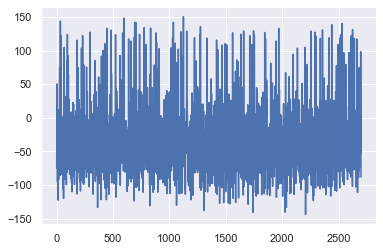

In [23]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [24]:
print (asks[0])
print (prediction[0])

1363.0
[1287.6188]


In [26]:
nodes = 100
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [27]:
model.fit(X, Y, batch_size=50, epochs=100, validation_split=0.2, verbose=2)

Epoch 1/100
480/480 - 1s - loss: 583514.6875 - val_loss: 23711.4766
Epoch 2/100
480/480 - 1s - loss: 26865.8516 - val_loss: 5696.3452
Epoch 3/100
480/480 - 0s - loss: 21195.7676 - val_loss: 4795.9976
Epoch 4/100
480/480 - 1s - loss: 20524.5781 - val_loss: 4464.2422
Epoch 5/100
480/480 - 1s - loss: 20373.0195 - val_loss: 4403.7510
Epoch 6/100
480/480 - 0s - loss: 19660.5488 - val_loss: 4561.6304
Epoch 7/100
480/480 - 0s - loss: 19370.5000 - val_loss: 3903.5674
Epoch 8/100
480/480 - 1s - loss: 19411.0645 - val_loss: 4326.1211
Epoch 9/100
480/480 - 1s - loss: 19163.1465 - val_loss: 3812.2190
Epoch 10/100
480/480 - 0s - loss: 19000.3105 - val_loss: 3605.9624
Epoch 11/100
480/480 - 0s - loss: 18824.2090 - val_loss: 3453.1768
Epoch 12/100
480/480 - 1s - loss: 18475.2930 - val_loss: 3807.2527
Epoch 13/100
480/480 - 0s - loss: 18673.2031 - val_loss: 3544.1536
Epoch 14/100
480/480 - 1s - loss: 18451.2969 - val_loss: 3404.3577
Epoch 15/100
480/480 - 1s - loss: 18354.4180 - val_loss: 3031.8926
Ep

In [28]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_3')

INFO:tensorflow:Assets written to: model2021_3\assets


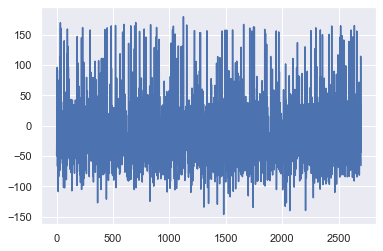

In [29]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

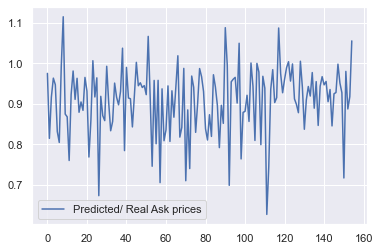

1293.037637707725
1388.0
0.9094007150618233


In [138]:
diff = []
df_test = pd.read_csv('test.csv')
df_test_pred = pd.read_csv('pred.csv')
diff= []
for i in range(280,len(df_test['ask'])-6105):
    try:
        diff.append(df_test_pred['Predicted'][i]/df_test['ending_ask'][i])
    except:
        pass
plt.plot(diff,label ='Predicted/ Real Ask prices')
plt.legend()
plt.show()
print (df_test_pred['Predicted'][300])
print (df_test['ending_ask'][300])
print (Average(diff))

In [31]:
nodes = 100
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [32]:
model.fit(X, Y, batch_size=100, epochs=1000, validation_split=0.3, verbose=2)

840 - val_loss: 974.5540
Epoch 704/1000
210/210 - 0s - loss: 10022.0479 - val_loss: 779.1000
Epoch 705/1000
210/210 - 0s - loss: 9871.7383 - val_loss: 1033.6483
Epoch 706/1000
210/210 - 0s - loss: 10099.8213 - val_loss: 858.0920
Epoch 707/1000
210/210 - 0s - loss: 9973.1455 - val_loss: 940.1331
Epoch 708/1000
210/210 - 1s - loss: 10098.1992 - val_loss: 880.1624
Epoch 709/1000
210/210 - 0s - loss: 9979.2734 - val_loss: 1082.7290
Epoch 710/1000
210/210 - 0s - loss: 9872.8652 - val_loss: 887.7501
Epoch 711/1000
210/210 - 0s - loss: 9919.0176 - val_loss: 845.1976
Epoch 712/1000
210/210 - 0s - loss: 9990.3535 - val_loss: 741.7787
Epoch 713/1000
210/210 - 0s - loss: 9932.1055 - val_loss: 925.7496
Epoch 714/1000
210/210 - 0s - loss: 9924.4697 - val_loss: 950.7113
Epoch 715/1000
210/210 - 0s - loss: 9808.2402 - val_loss: 781.2790
Epoch 716/1000
210/210 - 0s - loss: 10054.8750 - val_loss: 796.7549
Epoch 717/1000
210/210 - 0s - loss: 9968.3447 - val_loss: 773.6953
Epoch 718/1000
210/210 - 0s - l

In [33]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_4')

INFO:tensorflow:Assets written to: model2021_4\assets


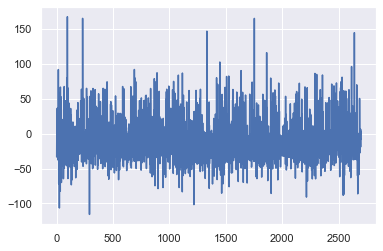

In [34]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [35]:
print (asks[0])
print (prediction[0])

1363.0
[1329.6079]


In [36]:
nodes = 200
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [37]:
model.fit(X, Y, batch_size=100, epochs=10, validation_split=0.3, verbose=2)

Epoch 1/10
210/210 - 1s - loss: 108625.2344 - val_loss: 39938.9883
Epoch 2/10
210/210 - 1s - loss: 50942.3281 - val_loss: 54155.0312
Epoch 3/10
210/210 - 1s - loss: 48719.9648 - val_loss: 27394.8301
Epoch 4/10
210/210 - 1s - loss: 46551.0625 - val_loss: 6886.3857
Epoch 5/10
210/210 - 1s - loss: 44211.4141 - val_loss: 10428.2734
Epoch 6/10
210/210 - 1s - loss: 41483.6133 - val_loss: 19627.9844
Epoch 7/10
210/210 - 1s - loss: 38591.0547 - val_loss: 44647.7734
Epoch 8/10
210/210 - 1s - loss: 35563.0000 - val_loss: 24428.4844
Epoch 9/10
210/210 - 1s - loss: 32268.7363 - val_loss: 20529.8125
Epoch 10/10
210/210 - 1s - loss: 29030.2910 - val_loss: 4942.4985


In [38]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_5')

INFO:tensorflow:Assets written to: model2021_5\assets


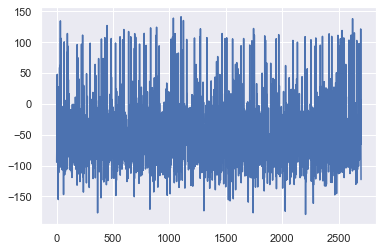

In [39]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [43]:
model.fit(X, Y, batch_size=50, epochs=1000, validation_split=0.20, verbose=2)

Epoch 1/100
225/225 - 1s - loss: 14105.1934 - val_loss: 8392.9355
Epoch 2/100
225/225 - 1s - loss: 13863.6758 - val_loss: 2119.5461
Epoch 3/100
225/225 - 1s - loss: 13676.6182 - val_loss: 11263.8877
Epoch 4/100
225/225 - 2s - loss: 13440.2988 - val_loss: 22637.8125
Epoch 5/100
225/225 - 1s - loss: 13109.6289 - val_loss: 1954.7482
Epoch 6/100
225/225 - 1s - loss: 12879.4912 - val_loss: 5296.5830
Epoch 7/100
225/225 - 1s - loss: 12614.1680 - val_loss: 4844.6646
Epoch 8/100
225/225 - 1s - loss: 12243.4385 - val_loss: 10555.1670
Epoch 9/100
225/225 - 1s - loss: 12006.7500 - val_loss: 14199.6426
Epoch 10/100
225/225 - 1s - loss: 11689.4141 - val_loss: 11801.8848
Epoch 11/100
225/225 - 1s - loss: 11467.6611 - val_loss: 9199.4805
Epoch 12/100
225/225 - 1s - loss: 11483.5107 - val_loss: 18394.7031
Epoch 13/100
225/225 - 1s - loss: 11186.4102 - val_loss: 7490.9121
Epoch 14/100
225/225 - 1s - loss: 11009.6416 - val_loss: 12922.0977
Epoch 15/100
225/225 - 1s - loss: 10852.6660 - val_loss: 25570.5

In [44]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_5')

INFO:tensorflow:Assets written to: model2021_5\assets


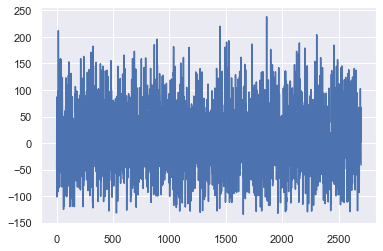

In [46]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [47]:
model.fit(X, Y, batch_size=50, epochs=1000, validation_split=0.20, verbose=2)


och 707/1000
480/480 - 2s - loss: 953.1818 - val_loss: 29903.6328
Epoch 708/1000
480/480 - 2s - loss: 977.0568 - val_loss: 26777.5234
Epoch 709/1000
480/480 - 3s - loss: 970.1156 - val_loss: 26276.8828
Epoch 710/1000
480/480 - 3s - loss: 975.4986 - val_loss: 25271.2070
Epoch 711/1000
480/480 - 3s - loss: 972.2742 - val_loss: 26732.3848
Epoch 712/1000
480/480 - 3s - loss: 973.4886 - val_loss: 26831.7734
Epoch 713/1000
480/480 - 3s - loss: 993.0684 - val_loss: 27618.6191
Epoch 714/1000
480/480 - 2s - loss: 984.6506 - val_loss: 26809.3672
Epoch 715/1000
480/480 - 2s - loss: 1010.0776 - val_loss: 27770.4688
Epoch 716/1000
480/480 - 2s - loss: 987.6596 - val_loss: 26858.9648
Epoch 717/1000
480/480 - 2s - loss: 992.2520 - val_loss: 26417.9844
Epoch 718/1000
480/480 - 2s - loss: 976.3295 - val_loss: 25433.9512
Epoch 719/1000
480/480 - 3s - loss: 995.1056 - val_loss: 24804.9277
Epoch 720/1000
480/480 - 3s - loss: 977.8458 - val_loss: 24801.4082
Epoch 721/1000
480/480 - 2s - loss: 986.3841 - va

In [48]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_6')

INFO:tensorflow:Assets written to: model2021_6\assets


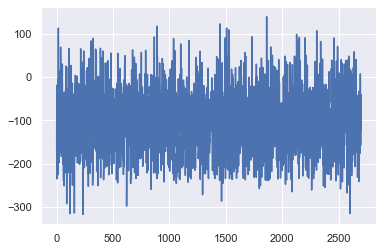

In [51]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [52]:
nodes = 200
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(200, activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='selu'))
model.add(Dropout(0.25))
model.add(Dense(25, activation='selu'))
model.add(Dropout(0.25))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(10, activation='selu'))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [53]:
model.fit(X, Y, batch_size=64, epochs=10, validation_split=0.3, verbose=2)

Epoch 1/10
329/329 - 2s - loss: 234660.4531 - val_loss: 28256.3477
Epoch 2/10
329/329 - 2s - loss: 89844.5469 - val_loss: 286825.6562
Epoch 3/10
329/329 - 1s - loss: 67652.5859 - val_loss: 303183.3438
Epoch 4/10
329/329 - 1s - loss: 54826.3984 - val_loss: 280031.3125
Epoch 5/10
329/329 - 1s - loss: 47597.4414 - val_loss: 327665.4375
Epoch 6/10
329/329 - 1s - loss: 43794.9648 - val_loss: 354531.8750
Epoch 7/10
329/329 - 1s - loss: 39980.0039 - val_loss: 355439.3750
Epoch 8/10
329/329 - 1s - loss: 37077.2070 - val_loss: 444300.5312
Epoch 9/10
329/329 - 1s - loss: 34606.1641 - val_loss: 295473.6875
Epoch 10/10
329/329 - 1s - loss: 32887.0938 - val_loss: 326769.9062


In [6]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_6')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model2021_6\assets


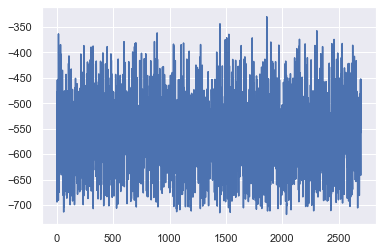

In [59]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [75]:
nodes = 200
model = Sequential()

model.add(Dense(nodes, input_dim=X.shape[1]))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.25))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(nodes, activation='relu'))
model.add(Dense(1))
          
model.compile(loss='mse',optimizer='rmsprop')

In [76]:
model.fit(X, Y, batch_size=100, epochs=15, validation_split=0.3, verbose=2)

Epoch 1/15
210/210 - 1s - loss: 109080.6641 - val_loss: 15962.1211
Epoch 2/15
210/210 - 1s - loss: 52800.1602 - val_loss: 61120.3711
Epoch 3/15
210/210 - 1s - loss: 50331.0000 - val_loss: 17895.6641
Epoch 4/15
210/210 - 1s - loss: 47597.6133 - val_loss: 38599.6484
Epoch 5/15
210/210 - 1s - loss: 45393.9336 - val_loss: 48362.2734
Epoch 6/15
210/210 - 1s - loss: 43042.1602 - val_loss: 9355.4395
Epoch 7/15
210/210 - 1s - loss: 40912.9375 - val_loss: 14911.6777
Epoch 8/15
210/210 - 1s - loss: 39088.6055 - val_loss: 30367.7188
Epoch 9/15
210/210 - 1s - loss: 37055.9961 - val_loss: 8119.6318
Epoch 10/15
210/210 - 1s - loss: 32723.3711 - val_loss: 15678.1143
Epoch 11/15
210/210 - 1s - loss: 29607.8320 - val_loss: 6374.9575
Epoch 12/15
210/210 - 1s - loss: 27558.1875 - val_loss: 3483.8130
Epoch 13/15
210/210 - 1s - loss: 25520.8867 - val_loss: 33049.9805
Epoch 14/15
210/210 - 1s - loss: 23518.8945 - val_loss: 3094.3589
Epoch 15/15
210/210 - 1s - loss: 23633.1367 - val_loss: 30666.1191


In [77]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_6')

INFO:tensorflow:Assets written to: model2021_6\assets


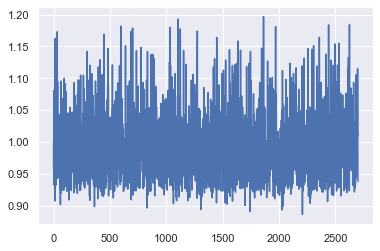

In [80]:
diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]/(asks[i]-150))

plt.plot(diff)
plt.show()

In [86]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [87]:
model.fit(X, Y, epochs=15, validation_split=0.3, verbose=2,shuffle=True)

Epoch 1/15

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 1s - loss: 169184.7656 - val_loss: 4448.4199
Epoch 2/15
657/657 - 1s - loss: 4317.8516 - val_loss: 3786.0645
Epoch 3/15
657/657 - 1s - loss: 3714.9143 - val_loss: 3340.0532
Epoch 4/15
657/657 - 1s - loss: 3321.8975 - val_loss: 2904.4419
Epoch 5/15
657/657 - 1s - loss: 3054.5605 - val_loss: 2755.6074
Epoch 6/15
657/657 - 1s - loss: 2994.2932 - val_loss: 2679.7642
Epoch 7/15
657/657 - 1s - loss: 2947.1252 - val_loss: 2830.7144
Epoch 8/15
657/657 - 1s - loss: 2917.0830 - val_loss: 3022

INFO:tensorflow:Assets written to: model2021_7\assets


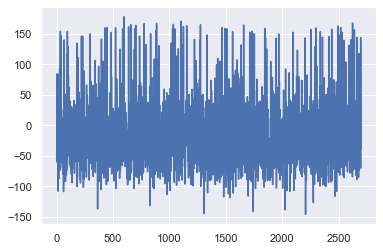

In [88]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_7')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [89]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [90]:
model.fit(X, Y, epochs=30, validation_split=0.3, verbose=2,shuffle=True)

Epoch 1/30

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 1s - loss: 164882.4375 - val_loss: 4579.0845
Epoch 2/30
657/657 - 1s - loss: 3872.7913 - val_loss: 3135.2166
Epoch 3/30
657/657 - 1s - loss: 2919.6379 - val_loss: 2400.9402
Epoch 4/30
657/657 - 1s - loss: 2513.3914 - val_loss: 2312.5061
Epoch 5/30
657/657 - 1s - loss: 2382.0359 - val_loss: 2167.7112
Epoch 6/30
657/657 - 1s - loss: 2296.7217 - val_loss: 2033.9387
Epoch 7/30
657/657 - 1s - loss: 2262.0198 - val_loss: 2025.6528
Epoch 8/30
657/657 - 1s - loss: 2220.7463 - val_loss: 2771

INFO:tensorflow:Assets written to: model2021_8\assets


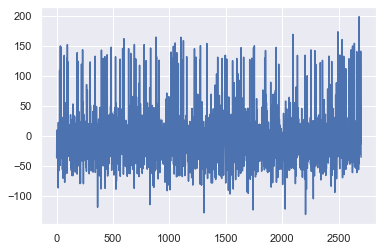

In [91]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_8')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [95]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [96]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)


Epoch 698/1000
657/657 - 1s - loss: 457.4335 - val_loss: 425.0033
Epoch 699/1000
657/657 - 1s - loss: 459.9022 - val_loss: 585.5842
Epoch 700/1000
657/657 - 1s - loss: 468.0502 - val_loss: 485.6322
Epoch 701/1000
657/657 - 1s - loss: 468.0318 - val_loss: 429.4694
Epoch 702/1000
657/657 - 1s - loss: 460.2005 - val_loss: 490.2324
Epoch 703/1000
657/657 - 1s - loss: 467.6342 - val_loss: 490.3380
Epoch 704/1000
657/657 - 1s - loss: 443.1444 - val_loss: 487.3471
Epoch 705/1000
657/657 - 1s - loss: 446.7173 - val_loss: 458.9891
Epoch 706/1000
657/657 - 1s - loss: 457.3574 - val_loss: 467.6232
Epoch 707/1000
657/657 - 1s - loss: 468.7394 - val_loss: 548.1356
Epoch 708/1000
657/657 - 1s - loss: 455.9296 - val_loss: 416.9863
Epoch 709/1000
657/657 - 1s - loss: 440.6386 - val_loss: 424.4248
Epoch 710/1000
657/657 - 1s - loss: 453.6309 - val_loss: 515.0425
Epoch 711/1000
657/657 - 1s - loss: 462.1549 - val_loss: 492.0449
Epoch 712/1000
657/657 - 1s - loss: 459.2141 - val_loss: 440.7154
Epoch 713

INFO:tensorflow:Assets written to: model2021_9\assets


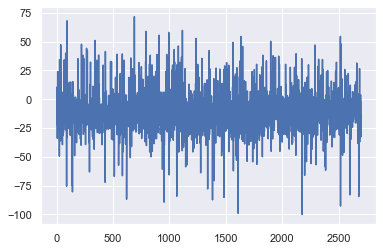

In [97]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_9')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [98]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [99]:
model.fit(X, Y, epochs=2000, validation_split=0.3, verbose=2,shuffle=True)

 - loss: 155.0575 - val_loss: 146.5674
Epoch 1703/2000
657/657 - 1s - loss: 140.2832 - val_loss: 167.1017
Epoch 1704/2000
657/657 - 1s - loss: 150.0123 - val_loss: 148.7312
Epoch 1705/2000
657/657 - 1s - loss: 150.2182 - val_loss: 145.9025
Epoch 1706/2000
657/657 - 1s - loss: 148.3012 - val_loss: 147.9721
Epoch 1707/2000
657/657 - 1s - loss: 146.4894 - val_loss: 140.2117
Epoch 1708/2000
657/657 - 1s - loss: 150.9390 - val_loss: 128.1026
Epoch 1709/2000
657/657 - 1s - loss: 143.7811 - val_loss: 141.2892
Epoch 1710/2000
657/657 - 1s - loss: 146.3943 - val_loss: 161.2595
Epoch 1711/2000
657/657 - 1s - loss: 141.1873 - val_loss: 170.9251
Epoch 1712/2000
657/657 - 1s - loss: 154.5646 - val_loss: 170.9636
Epoch 1713/2000
657/657 - 1s - loss: 142.3940 - val_loss: 238.1705
Epoch 1714/2000
657/657 - 1s - loss: 143.0196 - val_loss: 151.2737
Epoch 1715/2000
657/657 - 1s - loss: 142.8983 - val_loss: 135.9432
Epoch 1716/2000
657/657 - 1s - loss: 140.8530 - val_loss: 156.6665
Epoch 1717/2000
657/657

INFO:tensorflow:Assets written to: model2021_11\assets


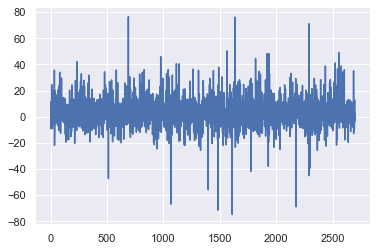

In [100]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_11')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [103]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [104]:
model.fit(X, Y, epochs=4000, validation_split=0.3, verbose=2,shuffle=True)

s - loss: 45.1298 - val_loss: 98.0592
Epoch 3694/4000
657/657 - 1s - loss: 44.2344 - val_loss: 45.7924
Epoch 3695/4000
657/657 - 1s - loss: 49.1349 - val_loss: 45.6712
Epoch 3696/4000
657/657 - 1s - loss: 43.4356 - val_loss: 47.7544
Epoch 3697/4000
657/657 - 1s - loss: 43.2335 - val_loss: 63.9117
Epoch 3698/4000
657/657 - 1s - loss: 46.0917 - val_loss: 71.1747
Epoch 3699/4000
657/657 - 1s - loss: 47.3285 - val_loss: 56.6607
Epoch 3700/4000
657/657 - 1s - loss: 45.4015 - val_loss: 46.2057
Epoch 3701/4000
657/657 - 1s - loss: 42.6722 - val_loss: 58.8869
Epoch 3702/4000
657/657 - 1s - loss: 44.0793 - val_loss: 46.4388
Epoch 3703/4000
657/657 - 1s - loss: 46.8540 - val_loss: 50.7961
Epoch 3704/4000
657/657 - 1s - loss: 46.1441 - val_loss: 43.8540
Epoch 3705/4000
657/657 - 1s - loss: 43.4255 - val_loss: 47.3933
Epoch 3706/4000
657/657 - 1s - loss: 51.0128 - val_loss: 57.6597
Epoch 3707/4000
657/657 - 1s - loss: 40.5826 - val_loss: 66.0902
Epoch 3708/4000
657/657 - 1s - loss: 41.3636 - val_l

INFO:tensorflow:Assets written to: model2021_13\assets


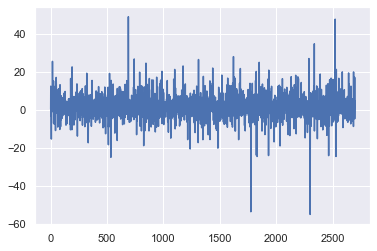

In [105]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_13')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [11]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
model.fit(X, Y, epochs=2000, validation_split=0.3, verbose=2,shuffle=True)

 58.0337 - val_loss: 68.6261
Epoch 1694/2000
657/657 - 1s - loss: 42.4151 - val_loss: 52.3416
Epoch 1695/2000
657/657 - 1s - loss: 47.3216 - val_loss: 61.2893
Epoch 1696/2000
657/657 - 1s - loss: 51.5971 - val_loss: 49.4377
Epoch 1697/2000
657/657 - 1s - loss: 58.5125 - val_loss: 53.5255
Epoch 1698/2000
657/657 - 1s - loss: 45.1879 - val_loss: 61.2517
Epoch 1699/2000
657/657 - 1s - loss: 54.6792 - val_loss: 64.5939
Epoch 1700/2000
657/657 - 1s - loss: 61.9767 - val_loss: 67.2519
Epoch 1701/2000
657/657 - 1s - loss: 47.1496 - val_loss: 72.4928
Epoch 1702/2000
657/657 - 1s - loss: 52.1894 - val_loss: 57.7049
Epoch 1703/2000
657/657 - 1s - loss: 45.5005 - val_loss: 67.2518
Epoch 1704/2000
657/657 - 1s - loss: 47.9945 - val_loss: 71.3301
Epoch 1705/2000
657/657 - 1s - loss: 48.7583 - val_loss: 50.3746
Epoch 1706/2000
657/657 - 1s - loss: 48.0277 - val_loss: 55.2506
Epoch 1707/2000
657/657 - 1s - loss: 47.5556 - val_loss: 41.9525
Epoch 1708/2000
657/657 - 1s - loss: 66.2815 - val_loss: 44.7

INFO:tensorflow:Assets written to: model2021_14\assets


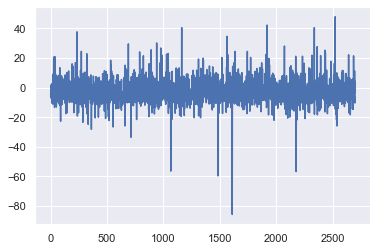

In [13]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_14')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [16]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.fit(X, Y, epochs=4000, validation_split=0.3, verbose=2,shuffle=True)

val_loss: 23.8735
Epoch 3691/4000
657/657 - 2s - loss: 8.5819 - val_loss: 12.1297
Epoch 3692/4000
657/657 - 2s - loss: 12.4711 - val_loss: 18.5183
Epoch 3693/4000
657/657 - 2s - loss: 12.8439 - val_loss: 21.7660
Epoch 3694/4000
657/657 - 2s - loss: 19.1338 - val_loss: 24.3569
Epoch 3695/4000
657/657 - 2s - loss: 19.3846 - val_loss: 26.4326
Epoch 3696/4000
657/657 - 2s - loss: 21.2209 - val_loss: 77.6151
Epoch 3697/4000
657/657 - 2s - loss: 25.1594 - val_loss: 11.5589
Epoch 3698/4000
657/657 - 2s - loss: 8.8669 - val_loss: 15.7569
Epoch 3699/4000
657/657 - 2s - loss: 12.5214 - val_loss: 20.4967
Epoch 3700/4000
657/657 - 2s - loss: 13.9412 - val_loss: 26.5461
Epoch 3701/4000
657/657 - 2s - loss: 28.5651 - val_loss: 14.1687
Epoch 3702/4000
657/657 - 2s - loss: 16.8774 - val_loss: 63.3839
Epoch 3703/4000
657/657 - 2s - loss: 12.7971 - val_loss: 11.7833
Epoch 3704/4000
657/657 - 2s - loss: 19.2012 - val_loss: 33.7825
Epoch 3705/4000
657/657 - 2s - loss: 96.8079 - val_loss: 12.0885
Epoch 370

INFO:tensorflow:Assets written to: model2021_15\assets


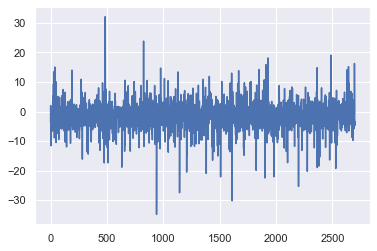

In [18]:
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_15')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [19]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 22s - loss: 44821.4609 - val_loss: 7921.1797
Epoch 2/10
657/657 - 23s - loss: 3175.9438 - val_loss: 2981.0938
Epoch 3/10
657/657 - 23s - loss: 3593.5261 - val_loss: 1875.7476
Epoch 4/10
657/657 - 24s - loss: 3751.3608 - val_loss: 1697.7020
Epoch 5/10
657/657 - 33s - loss: 3864.1902 - val_loss: 2278.7488
Epoch 6/10
657/657 - 32s - loss: 2886.2651 - val_loss: 10527.1924
Epoch 7/10
657/657 - 28s - loss: 3072.5857 - val_loss: 1471.2229
Epoch 8/10
657/657 - 24s - loss: 2753.1685 - val_lo

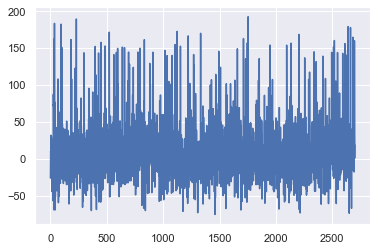

In [20]:
model.fit(X, Y, epochs=10, validation_split=0.3, verbose=2,shuffle=True)
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_16')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [21]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(800,activation='relu'))
model.add(Dense(600,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

Epoch 1/101

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 25s - loss: 36626.3984 - val_loss: 8204.0566
Epoch 2/101
657/657 - 26s - loss: 3164.1033 - val_loss: 2200.6458
Epoch 3/101
657/657 - 26s - loss: 3221.4146 - val_loss: 1427.2916
Epoch 4/101
657/657 - 28s - loss: 3159.1025 - val_loss: 3199.3979
Epoch 5/101
657/657 - 25s - loss: 2372.4094 - val_loss: 1208.9072
Epoch 6/101
657/657 - 24s - loss: 2460.3279 - val_loss: 1314.1553
Epoch 7/101
657/657 - 25s - loss: 2375.6165 - val_loss: 1202.2345
Epoch 8/101
657/657 - 30s - loss: 1814.0917 -

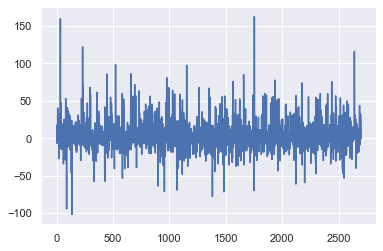

In [22]:
model.fit(X, Y, epochs=101, validation_split=0.3, verbose=2,shuffle=True)
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_17')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()

In [26]:
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

312.82415771484375

In [27]:
model = Sequential()
model.add(Dense(50,activation='selu'))
model.add(Dense(100,activation='selu'))
model.add(Dense(200,activation='selu'))
model.add(Dense(400,activation='selu'))
model.add(Dense(400,activation='selu'))
model.add(Dense(200,activation='selu'))
model.add(Dense(100,activation='selu'))
model.add(Dense(50,activation='selu'))
model.add(Dense(1,activation='selu'))
model.compile(loss='mean_squared_error',optimizer='adam')

- 3s - loss: 77.3751 - val_loss: 61.1774
Epoch 698/1000
657/657 - 3s - loss: 73.8440 - val_loss: 59.7279
Epoch 699/1000
657/657 - 3s - loss: 85.5565 - val_loss: 219.9144
Epoch 700/1000
657/657 - 3s - loss: 1115.1295 - val_loss: 701.2408
Epoch 701/1000
657/657 - 3s - loss: 629.4154 - val_loss: 529.7207
Epoch 702/1000
657/657 - 3s - loss: 492.0928 - val_loss: 463.8309
Epoch 703/1000
657/657 - 3s - loss: 441.8320 - val_loss: 436.2483
Epoch 704/1000
657/657 - 3s - loss: 386.0241 - val_loss: 390.3293
Epoch 705/1000
657/657 - 3s - loss: 366.2130 - val_loss: 356.4591
Epoch 706/1000
657/657 - 3s - loss: 338.1604 - val_loss: 307.8920
Epoch 707/1000
657/657 - 3s - loss: 327.8205 - val_loss: 307.3532
Epoch 708/1000
657/657 - 3s - loss: 290.9986 - val_loss: 288.0005
Epoch 709/1000
657/657 - 3s - loss: 298.5793 - val_loss: 330.2516
Epoch 710/1000
657/657 - 3s - loss: 265.9718 - val_loss: 260.8364
Epoch 711/1000
657/657 - 3s - loss: 267.2982 - val_loss: 248.1799
Epoch 712/1000
657/657 - 3s - loss: 2

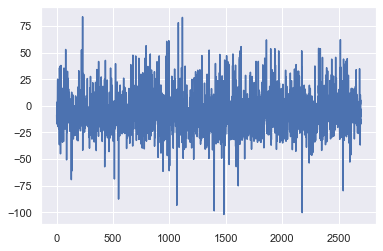

In [29]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_18')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [4]:
model = Sequential()
model.add(Dense(50,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(200,activation='elu'))
model.add(Dense(400,activation='elu'))
model.add(Dense(400,activation='elu'))
model.add(Dense(200,activation='elu'))
model.add(Dense(100,activation='elu'))
model.add(Dense(50,activation='elu'))
model.add(Dense(1,activation='elu'))
model.compile(loss='mean_squared_error',optimizer='adam')

000
657/657 - 2s - loss: 54.5644 - val_loss: 55.0927
Epoch 709/1000
657/657 - 2s - loss: 75.9792 - val_loss: 249.8900
Epoch 710/1000
657/657 - 2s - loss: 579.9059 - val_loss: 304.0401
Epoch 711/1000
657/657 - 2s - loss: 298.6574 - val_loss: 328.5732
Epoch 712/1000
657/657 - 2s - loss: 215.4452 - val_loss: 181.9065
Epoch 713/1000
657/657 - 2s - loss: 184.8544 - val_loss: 219.0333
Epoch 714/1000
657/657 - 2s - loss: 148.2342 - val_loss: 150.3007
Epoch 715/1000
657/657 - 2s - loss: 179.6156 - val_loss: 115.0082
Epoch 716/1000
657/657 - 2s - loss: 148.2355 - val_loss: 128.7921
Epoch 717/1000
657/657 - 2s - loss: 162.8173 - val_loss: 118.6345
Epoch 718/1000
657/657 - 2s - loss: 141.0294 - val_loss: 92.4985
Epoch 719/1000
657/657 - 2s - loss: 110.2216 - val_loss: 106.7010
Epoch 720/1000
657/657 - 2s - loss: 124.6161 - val_loss: 230.8910
Epoch 721/1000
657/657 - 2s - loss: 132.4128 - val_loss: 306.7766
Epoch 722/1000
657/657 - 2s - loss: 106.0791 - val_loss: 101.7803
Epoch 723/1000
657/657 - 

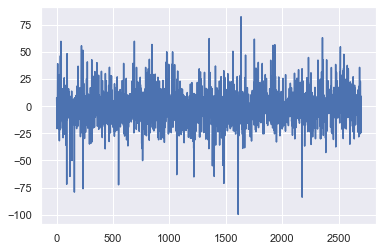

217.18128967285156

In [5]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask'] 
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_19')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [6]:
model = Sequential()
model.add(Dense(50,activation='linear'))
model.add(Dense(100,activation='linear'))
model.add(Dense(200,activation='linear'))
model.add(Dense(400,activation='linear'))
model.add(Dense(400,activation='linear'))
model.add(Dense(200,activation='linear'))
model.add(Dense(100,activation='linear'))
model.add(Dense(50,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

val_loss: 2559.1096
Epoch 708/1000
657/657 - 3s - loss: 2769.6189 - val_loss: 2532.9404
Epoch 709/1000
657/657 - 3s - loss: 2773.3186 - val_loss: 2524.6277
Epoch 710/1000
657/657 - 3s - loss: 2738.1160 - val_loss: 2581.3132
Epoch 711/1000
657/657 - 2s - loss: 2733.3081 - val_loss: 2535.0674
Epoch 712/1000
657/657 - 2s - loss: 2745.3635 - val_loss: 2987.9121
Epoch 713/1000
657/657 - 3s - loss: 2733.1648 - val_loss: 3342.9763
Epoch 714/1000
657/657 - 3s - loss: 2734.6448 - val_loss: 2549.9580
Epoch 715/1000
657/657 - 3s - loss: 2724.5476 - val_loss: 2513.7979
Epoch 716/1000
657/657 - 2s - loss: 2765.7874 - val_loss: 2512.9419
Epoch 717/1000
657/657 - 2s - loss: 2728.3955 - val_loss: 2680.0127
Epoch 718/1000
657/657 - 2s - loss: 2727.2744 - val_loss: 2546.1038
Epoch 719/1000
657/657 - 2s - loss: 2738.5195 - val_loss: 2510.0046
Epoch 720/1000
657/657 - 2s - loss: 2741.8564 - val_loss: 2576.9319
Epoch 721/1000
657/657 - 2s - loss: 2724.3342 - val_loss: 2530.2471
Epoch 722/1000
657/657 - 2s 

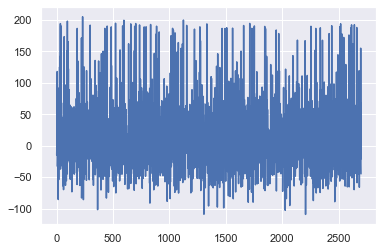

2886.7275390625

In [7]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
scale_test = pd.read_csv("endingNotScaledTest.csv")
asks = scale_test['ending_ask']
del scale_test['ending_ask']

prediction = model.predict(scale_test)
model.save('model2021_20')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [12]:
model = Sequential()
model.add(Dense(50,activation='linear'))
model.add(Dense(100,activation='linear'))
model.add(Dense(200,activation='linear'))
model.add(Dense(400,activation='linear'))
model.add(Dense(400,activation='linear'))
model.add(Dense(200,activation='linear'))
model.add(Dense(100,activation='linear'))
model.add(Dense(50,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

val_loss: 2513.8716
Epoch 708/1000
657/657 - 2s - loss: 2744.9143 - val_loss: 2715.7498
Epoch 709/1000
657/657 - 2s - loss: 2751.3118 - val_loss: 2783.6321
Epoch 710/1000
657/657 - 2s - loss: 2773.1450 - val_loss: 2526.7100
Epoch 711/1000
657/657 - 2s - loss: 2717.4714 - val_loss: 2600.9822
Epoch 712/1000
657/657 - 2s - loss: 2745.1763 - val_loss: 2556.7561
Epoch 713/1000
657/657 - 2s - loss: 2735.5168 - val_loss: 2638.8289
Epoch 714/1000
657/657 - 2s - loss: 2761.1633 - val_loss: 2640.1587
Epoch 715/1000
657/657 - 2s - loss: 2758.5703 - val_loss: 2590.0581
Epoch 716/1000
657/657 - 2s - loss: 2742.6956 - val_loss: 2514.0286
Epoch 717/1000
657/657 - 2s - loss: 2728.5767 - val_loss: 2534.5618
Epoch 718/1000
657/657 - 2s - loss: 2760.3240 - val_loss: 2523.9915
Epoch 719/1000
657/657 - 2s - loss: 2761.6670 - val_loss: 2853.9741
Epoch 720/1000
657/657 - 2s - loss: 2727.1719 - val_loss: 2536.6052
Epoch 721/1000
657/657 - 2s - loss: 2746.9692 - val_loss: 2830.6760
Epoch 722/1000
657/657 - 2s 

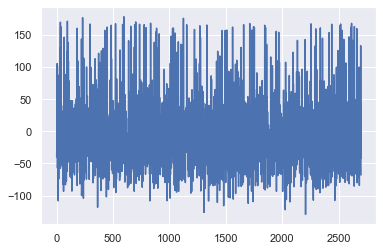

2680.3408203125

In [13]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_21')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [14]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(400,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(400,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(200,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(100,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(LeakyReLU())
model.add(Dropout(0.25))
model.add(Dense(1,activation='relu'))

model.compile(loss='mean_squared_error',optimizer='adam')

          

79
Epoch 712/1000
657/657 - 3s - loss: 12007.4111 - val_loss: 3234.1343
Epoch 713/1000
657/657 - 3s - loss: 12099.2861 - val_loss: 2636.5093
Epoch 714/1000
657/657 - 3s - loss: 12001.5957 - val_loss: 2792.3462
Epoch 715/1000
657/657 - 3s - loss: 11979.1523 - val_loss: 2875.3892
Epoch 716/1000
657/657 - 3s - loss: 12107.5244 - val_loss: 2719.5034
Epoch 717/1000
657/657 - 3s - loss: 11966.1680 - val_loss: 2571.2969
Epoch 718/1000
657/657 - 3s - loss: 11927.9688 - val_loss: 2547.5933
Epoch 719/1000
657/657 - 3s - loss: 11819.6865 - val_loss: 2755.2747
Epoch 720/1000
657/657 - 3s - loss: 11747.2246 - val_loss: 2941.6313
Epoch 721/1000
657/657 - 3s - loss: 11887.7207 - val_loss: 3514.0559
Epoch 722/1000
657/657 - 3s - loss: 11696.9854 - val_loss: 2944.1379
Epoch 723/1000
657/657 - 3s - loss: 11866.8994 - val_loss: 3216.3801
Epoch 724/1000
657/657 - 3s - loss: 11855.5957 - val_loss: 3067.4758
Epoch 725/1000
657/657 - 3s - loss: 11605.5010 - val_loss: 3078.3977
Epoch 726/1000
657/657 - 3s - l

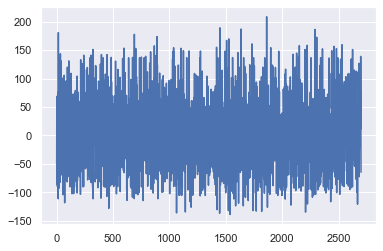

3578.423583984375

In [15]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_21')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [22]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

val_loss: 2122.5166
Epoch 708/1000
657/657 - 3s - loss: 5545.7285 - val_loss: 1972.3029
Epoch 709/1000
657/657 - 3s - loss: 5593.7661 - val_loss: 1835.7778
Epoch 710/1000
657/657 - 3s - loss: 5617.4038 - val_loss: 2043.5804
Epoch 711/1000
657/657 - 3s - loss: 5592.4102 - val_loss: 1818.2416
Epoch 712/1000
657/657 - 3s - loss: 5654.0537 - val_loss: 1907.2253
Epoch 713/1000
657/657 - 3s - loss: 5515.4688 - val_loss: 2015.1151
Epoch 714/1000
657/657 - 3s - loss: 5484.4956 - val_loss: 2096.1858
Epoch 715/1000
657/657 - 3s - loss: 5609.1641 - val_loss: 2144.2048
Epoch 716/1000
657/657 - 3s - loss: 5642.0596 - val_loss: 1382.2444
Epoch 717/1000
657/657 - 3s - loss: 5559.8540 - val_loss: 2244.3716
Epoch 718/1000
657/657 - 3s - loss: 5612.8237 - val_loss: 1655.8451
Epoch 719/1000
657/657 - 3s - loss: 5509.3135 - val_loss: 1863.7900
Epoch 720/1000
657/657 - 3s - loss: 5567.9629 - val_loss: 1742.5181
Epoch 721/1000
657/657 - 3s - loss: 5518.7559 - val_loss: 1837.4269
Epoch 722/1000
657/657 - 3s 

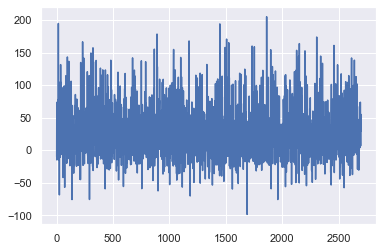

1955.3441162109375

In [23]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_22')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [24]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='softmax'))
model.compile(loss='mean_squared_error',optimizer='adam')

Epoch 1/10
657/657 - 3s - loss: 1580318.1250 - val_loss: 1580434.3750
Epoch 2/10
657/657 - 3s - loss: 1580318.3750 - val_loss: 1580434.3750
Epoch 3/10
657/657 - 3s - loss: 1580318.3750 - val_loss: 1580434.3750
Epoch 4/10
657/657 - 3s - loss: 1580318.0000 - val_loss: 1580434.3750
Epoch 5/10
657/657 - 3s - loss: 1580319.7500 - val_loss: 1580434.3750
Epoch 6/10
657/657 - 3s - loss: 1580319.0000 - val_loss: 1580434.3750
Epoch 7/10
657/657 - 3s - loss: 1580318.5000 - val_loss: 1580434.3750
Epoch 8/10
657/657 - 3s - loss: 1580318.3750 - val_loss: 1580434.3750
Epoch 9/10
657/657 - 3s - loss: 1580319.8750 - val_loss: 1580434.3750
Epoch 10/10
657/657 - 3s - loss: 1580319.8750 - val_loss: 1580434.3750
INFO:tensorflow:Assets written to: model2021_23\assets


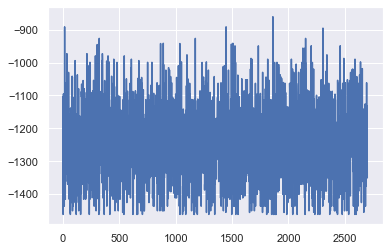

1572320.125

In [26]:
model.fit(X, Y, epochs=10, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_23')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [28]:
model = Sequential()
model.add(Dense(50,activation='softmax'))
model.add(Dense(100,activation='softmax'))
model.add(Dense(200,activation='softmax'))
model.add(Dense(400,activation='softmax'))
model.add(Dense(400,activation='softmax'))
model.add(Dense(200,activation='softmax'))
model.add(Dense(100,activation='softmax'))
model.add(Dense(50,activation='softmax'))
model.add(Dense(1,activation='softmax'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [29]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_24')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 2s - loss: 1580319.0000 - val_loss: 1580434.3750
Epoch 2/1000
657/657 - 2s - loss: 1580318.5000 - val_loss: 1580434.3750
Epoch 3/1000
657/657 - 2s - loss: 1580318.8750 - val_loss: 1580434.3750
Epoch 4/1000
657/657 - 2s - loss: 1580319.0000 - val_loss: 1580434.3750
Epoch 5/1000
657/657 - 2s - loss: 1580318.2500 - val_loss: 1580434.3750
Epoch 6/1000
657/657 - 2s - loss: 1580318.0000 - val_loss: 1580434.3750
Epoch 7/1000
657/657 - 2s - loss: 1580317.6250 - val_loss: 1580434.3750
Epoc

KeyboardInterrupt: 

In [33]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='Adamax')

 2s - loss: 38.7097 - val_loss: 48.7265
Epoch 690/1000
657/657 - 2s - loss: 32.5242 - val_loss: 45.9788
Epoch 691/1000
657/657 - 2s - loss: 39.7783 - val_loss: 51.2612
Epoch 692/1000
657/657 - 2s - loss: 41.8065 - val_loss: 29.1586
Epoch 693/1000
657/657 - 2s - loss: 40.5257 - val_loss: 56.9017
Epoch 694/1000
657/657 - 2s - loss: 37.7319 - val_loss: 51.3108
Epoch 695/1000
657/657 - 2s - loss: 40.4877 - val_loss: 30.3363
Epoch 696/1000
657/657 - 2s - loss: 38.3768 - val_loss: 40.2029
Epoch 697/1000
657/657 - 2s - loss: 38.0609 - val_loss: 45.1934
Epoch 698/1000
657/657 - 2s - loss: 34.2312 - val_loss: 36.1854
Epoch 699/1000
657/657 - 2s - loss: 40.3808 - val_loss: 55.8667
Epoch 700/1000
657/657 - 2s - loss: 37.4719 - val_loss: 28.7761
Epoch 701/1000
657/657 - 2s - loss: 34.8995 - val_loss: 42.6256
Epoch 702/1000
657/657 - 2s - loss: 38.2321 - val_loss: 33.7600
Epoch 703/1000
657/657 - 2s - loss: 40.8434 - val_loss: 36.9448
Epoch 704/1000
657/657 - 2s - loss: 37.1849 - val_loss: 29.6933


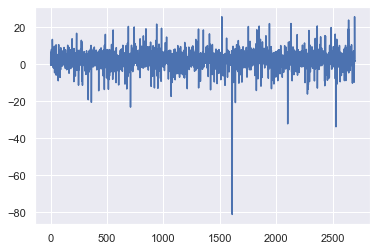

29.65983009338379

In [34]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_25')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [37]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='Adadelta')

val_loss: 1269.3267
Epoch 708/1000
657/657 - 2s - loss: 1314.3707 - val_loss: 1266.4072
Epoch 709/1000
657/657 - 2s - loss: 1313.2389 - val_loss: 1267.7129
Epoch 710/1000
657/657 - 2s - loss: 1312.4764 - val_loss: 1269.8937
Epoch 711/1000
657/657 - 2s - loss: 1311.2589 - val_loss: 1264.0039
Epoch 712/1000
657/657 - 2s - loss: 1309.8721 - val_loss: 1287.8002
Epoch 713/1000
657/657 - 2s - loss: 1309.5999 - val_loss: 1262.7599
Epoch 714/1000
657/657 - 2s - loss: 1309.0188 - val_loss: 1260.5502
Epoch 715/1000
657/657 - 2s - loss: 1306.9519 - val_loss: 1261.3914
Epoch 716/1000
657/657 - 2s - loss: 1306.7173 - val_loss: 1258.9771
Epoch 717/1000
657/657 - 2s - loss: 1306.4304 - val_loss: 1259.0431
Epoch 718/1000
657/657 - 2s - loss: 1304.6482 - val_loss: 1258.0764
Epoch 719/1000
657/657 - 2s - loss: 1304.3634 - val_loss: 1256.9561
Epoch 720/1000
657/657 - 2s - loss: 1302.9965 - val_loss: 1255.5605
Epoch 721/1000
657/657 - 2s - loss: 1302.4435 - val_loss: 1256.1980
Epoch 722/1000
657/657 - 2s 

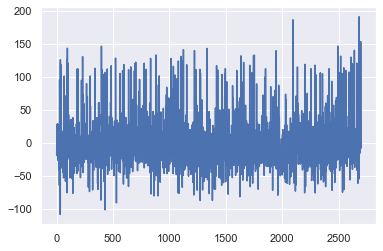

1169.4207763671875

In [38]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_26')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [39]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='SGD')

ss: nan
Epoch 645/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 646/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 647/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 648/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 649/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 650/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 651/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 652/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 653/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 654/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 655/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 656/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 657/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 658/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 659/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 660/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 661/1000
657/657 - 2s - loss: nan - val_loss: nan
Epoch 662/1000
657/657 - 2s - loss: nan 

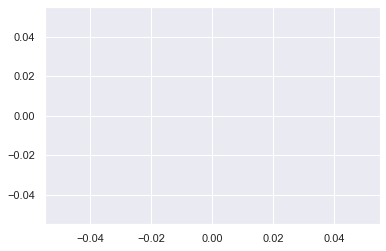

nan

In [40]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_27')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [4]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='Nadam')

INFO:tensorflow:Assets written to: model2021_28\assets


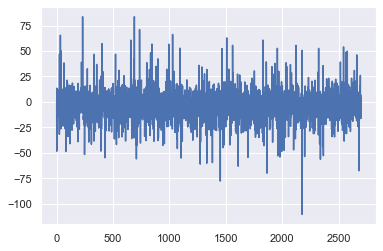

236.50192260742188

In [9]:
#model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)

prediction = model.predict(scale_test)
model.save('model2021_28')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [10]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='RMSprop')

21.6076
Epoch 699/1000
657/657 - 2s - loss: 290.3834 - val_loss: 481.2790
Epoch 700/1000
657/657 - 2s - loss: 308.8096 - val_loss: 755.1977
Epoch 701/1000
657/657 - 2s - loss: 311.8566 - val_loss: 712.3373
Epoch 702/1000
657/657 - 2s - loss: 299.6321 - val_loss: 288.0524
Epoch 703/1000
657/657 - 2s - loss: 292.6076 - val_loss: 376.4704
Epoch 704/1000
657/657 - 2s - loss: 295.8112 - val_loss: 197.4255
Epoch 705/1000
657/657 - 2s - loss: 293.6620 - val_loss: 778.3163
Epoch 706/1000
657/657 - 2s - loss: 293.5421 - val_loss: 974.0690
Epoch 707/1000
657/657 - 2s - loss: 288.1930 - val_loss: 177.8331
Epoch 708/1000
657/657 - 2s - loss: 294.8678 - val_loss: 210.6637
Epoch 709/1000
657/657 - 2s - loss: 293.7363 - val_loss: 311.2071
Epoch 710/1000
657/657 - 2s - loss: 297.1341 - val_loss: 316.1737
Epoch 711/1000
657/657 - 2s - loss: 295.9739 - val_loss: 677.7072
Epoch 712/1000
657/657 - 2s - loss: 299.1024 - val_loss: 304.7980
Epoch 713/1000
657/657 - 2s - loss: 293.5644 - val_loss: 201.0777
Ep

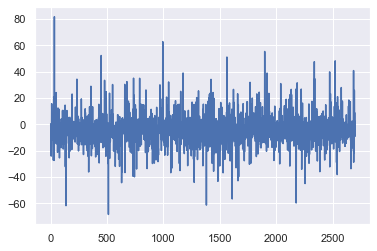

119.65790557861328

In [11]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_29')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [7]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(200,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(400,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(240,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

NameError: name 'Embedding' is not defined

In [6]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_30')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [ ]:
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(0,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_31')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(40,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(20,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(0,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True)
prediction = model.predict(scale_test)
model.save('model2021_32')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [8]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [10]:
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='min')

model.fit(X, Y, epochs=1000, validation_split=0.3, verbose=2,shuffle=True,  callbacks=[earlyStopping])
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

Epoch 1/1000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

657/657 - 2s - loss: 58398.8438 - accuracy: 0.0000e+00 - val_loss: 2790.6741 - val_accuracy: 0.0000e+00
Epoch 2/1000


KeyboardInterrupt: 

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000, batch_size=500, validation_split=0.2, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000, batch_size=50, validation_split=0.2, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000, batch_size=5000, validation_split=0.2, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000,  validation_split=0.3, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000,  validation_split=0.05, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate

In [ ]:
model = Sequential()
model.add(Dense(50,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(400,activation='relu'))
model.add(Dense(240,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [ ]:

model.fit(X, Y, epochs=1000,  validation_split=0.15, shuffle=True, verbose=2 , initial_epoch=0)
prediction = model.predict(scale_test)
model.save('model2021_33')

diff = []
for i in range(0,len(prediction)):
    diff.append(prediction[i]-asks[i])

plt.plot(diff)
plt.show()
test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_data_df = pd.read_csv("endingNotScaledTest.csv")
X_test = test_data_df.drop('ending_ask',axis=1).values
Y_test = test_data_df[['ending_ask']].values

test_error_rate = model.evaluate(X_test, Y_test, verbose=0)
test_error_rate